In [27]:
 !pip install keras.utils 

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=d5d47a20eed7122ec7870dde37cda0fab08cecb3e32a3a2af6b589700ccfcd39
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


## import the required Libraries

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints


# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub



import re
import nltk
from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

#Metrics 
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

> ## **First Approach :** 
In this part of code, We are going to mix both Laptop and Restaurant Dataset in order to increase and to test the AEAT-LSTM ability to Distinguish between different aspects and their polarity, the model will be able to return the polarity based on the sentence and a given aspect , different aspects are input separately

### Load the Restaurant Dataset ( Dataframe ) 

> what we are going to do it to load both restaurant and laptop datasets, and then we will concatenate them in order to increase the size of our dataset

In [29]:
restaurant_df = pd.read_csv("../input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv", encoding='utf8')

## load the laptop dataset ( dataframe )

In [4]:
laptop_df = pd.read_csv("../input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptop_Train_v2.csv", encoding='utf8')

In [ ]:
restaurant_df

In [ ]:
laptop_df.head()

### Concatenate the two dataframes so we can test the model on a different fields( Restaurant and Laptops)

In [30]:
df = restaurant_df  #.append(laptop_df, ignore_index=True)
#df = restaurant_df
#df = laptop_df

> display the dataset

In [ ]:
#display the dataset
df

In [6]:
from wordcloud import WordCloud 
wordcloud2 = WordCloud().generate(' '.join(df['Sentence'])),

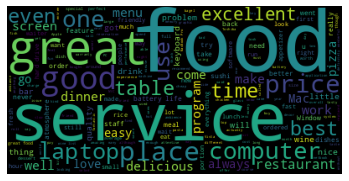

In [7]:
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [31]:
## display the columns of the dataframe
df.columns

Index(['id', 'Sentence', 'Aspect Term', 'polarity', 'from', 'to'], dtype='object')

In [32]:
## display the null values in the polarity column
df['polarity'].isna().sum()

0

In [33]:
## change the labels to integers for the training phase
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [34]:
df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,0,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,1,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,1,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,1,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,2,141,145


In [35]:
#Delete the useless Columns 
train_df = df.drop(['id','from','to'], axis = 1)

In [36]:
Aspects_term = train_df['polarity'].unique()

In [37]:
train_df.head()

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


In [38]:
train_df[train_df.polarity == 'conflict']

,Sentence,Aspect Term,polarity
64,The food was delicious but do not come here on...,food,conflict
101,The service varys from day to day- sometimes t...,service,conflict
133,Though the Spider Roll may look like a challen...,Spider Roll,conflict
142,"An oasis of refinement: Food, though somewhat...",Food,conflict
172,"Food is usually very good, though ocasionally ...",Food,conflict
...,...,...,...
3416,You can't say its cheap because food is cheape...,food,conflict
3421,"For years, I thought Tuscan cuisine was the be...",Tuscan cuisine,conflict
3610,Sake collection was excellent (Try Nanbu Bijin...,Sake collection,conflict
3625,Service was on par but not wonderful.,Service,conflict


In [39]:
## Delete the polarity than contains CONFLICT, Means that the sentence contains more than one sentiment when it comes to the aspect term
train_df.drop(train_df[train_df.polarity == 'conflict'].index, inplace = True)

In [40]:
## our new Dataframe
train_df

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2
...,...,...,...
3688,Each table has a pot of boiling water sunken i...,pot of boiling water,2
3689,Each table has a pot of boiling water sunken i...,meats,2
3690,Each table has a pot of boiling water sunken i...,vegetables,2
3691,Each table has a pot of boiling water sunken i...,rice,2


In [41]:
## Training data shape 
df.shape

(3693, 6)

In [42]:
# Polarities distribution in our dataset
train_df.polarity.value_counts()


1    2164
0     805
2     633
Name: polarity, dtype: int64

In [43]:
## Convert polarity Values to Integers 
train_df["polarity"] = pd.to_numeric(train_df["polarity"],errors='coerce')


In [44]:
## Display our training Dataframe 
train_df.head()

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


In [46]:
## drop the NAN Values from the dataframe
train_df.dropna(subset = ['polarity'], inplace = True)

In [47]:
## Verify if the dataframe contains any NAN Values
train_df.isna().sum()

Sentence       0
Aspect Term    0
polarity       0
dtype: int64

In [48]:
## Split the Dataset into Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['polarity'],stratify=train_df['polarity'], test_size=0.2, random_state=1)



In [49]:
# the size of the training dataset
X_train.Sentence.size

2881

In [24]:
# Display the shape of the target values!
y_train.shape

(4732,)

In [50]:
NUM_WORDS = 100000 ## MAx of words to keep, based on word frequency.
EMBEDDING_SIZE = 128 ## the length of the Vector the will 

## Embedding code

In [51]:
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, )
## Fit_on_texts : Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(list(X_train.Sentence))
text_X_train_tokenized = tokenizer.texts_to_sequences(X_train.Sentence) # list of tokenized sentences
Aspect_X_train_tokenized = tokenizer.texts_to_sequences(X_train['Aspect Term']) # list of tokenized sentences
text_X_test_tokenized = tokenizer.texts_to_sequences(X_test.Sentence) # list of tokenized sentences
Aspect_X_test_tokenized = tokenizer.texts_to_sequences(X_test['Aspect Term']) # list of tokenized sentences

In [52]:
##Maximum length of sentences
Max_Len =  max([len(one_title) for one_title in text_X_train_tokenized])
Max_Len

69

In [53]:
## Pads sequences(or sentences) to the same length.


text_X_train_padded = pad_sequences(text_X_train_tokenized, maxlen=Max_Len)
aspect_X_train_padded = pad_sequences(Aspect_X_train_tokenized, maxlen=1)

text_X_test_padded = pad_sequences(text_X_test_tokenized, maxlen=Max_Len)
aspect_X_test_padded = pad_sequences(Aspect_X_test_tokenized, maxlen=1)


In [29]:
## the embedding presentation of the aspects
aspect_X_train_padded[0]

array([77], dtype=int32)

In [30]:
## the embedding presentation of the Sentences

text_X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 168,  63,   1,  77, 262,  19, 263,  26, 269,  30,  35],
      dtype=int32)

In [102]:
## Concatenate the Embedding presentation of the sentences and aspects to Create training and testing dataset 
train_data =  [text_X_train_padded,aspect_X_train_padded]
test_data =   [text_X_test_padded,aspect_X_test_padded]

In [49]:
test_data[1][0]

array([728], dtype=int32)

## Attention Mechanism 

In [3]:

# modified based on `https://gist.github.com/cbaziotis/7ef97ccf71cbc14366835198c09809d2`
class Attention(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
 e: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None, W_constraint=None,
                 u_constraint=None, b_constraint=None, use_W=True, use_bias=False, return_self_attend=False,
                 return_attend_weight=True, **kwargs):
        self.supports_masking = True

        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.use_W = use_W
        self.use_bias = use_bias
        self.return_self_attend = return_self_attend    # whether perform self attention and return it
        self.return_attend_weight = return_attend_weight    # whether return attention weight
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        if self.use_W:
            self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),  initializer=self.init,
                                     name='{}_W'.format(self.name), regularizer=self.W_regularizer,
                                     constraint=self.W_constraint)
        if self.use_bias:
            self.b = self.add_weight(shape=(input_shape[1],), initializer='zero', name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer, constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],), initializer=self.init, name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer, constraint=self.u_constraint)
        
        super(Attention, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        if self.use_W:
            x = K.tanh(K.dot(x, self.W))

        ait = Attention.dot_product(x, self.u)
        if self.use_bias:
            ait += self.b

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        if self.return_self_attend:
            attend_output = K.sum(x * K.expand_dims(a), axis=1)
            if self.return_attend_weight:
                return [attend_output, a]
            else:
                return attend_output
        else:
            return a

    def compute_output_shape(self, input_shape):
        if self.return_self_attend:
            if self.return_attend_weight:
                return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[1])]
            else:
                return input_shape[0], input_shape[-1]
        else:
            return input_shape[0], input_shape[1]

    @staticmethod
    def dot_product(x, kernel):
        """
        Wrapper for dot product operation, in order to be compatible with both
        Theano and Tensorflow
        Args:
            x (): input
            kernel (): weights
        Returns:
        """
        if K.backend() == 'tensorflow':
            return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
        else:
            return K.dot(x, kernel)

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({
            "W_regularizer": regularizers.serialize(self.W_regularizer),
            "u_regularizer": regularizers.serialize(self.u_regularizer),
            "b_regularizer": regularizers.serialize(self.b_regularizer),
            "W_constraint": constraints.serialize(self.W_constraint),
            "u_constraint": constraints.serialize(self.u_constraint),
            "b_constraint": constraints.serialize(self.b_constraint),
            "use_W": self.use_W,
            "use_bias": self.use_bias,
            "return_self_attend": self.return_self_attend,
            "return_attend_weight": self.return_attend_weight
        })
        return config

## LSTM with Aspect Embedding

In [56]:
def ae_lstm(lstm_units = 512):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)
    
    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))
    
    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    aspect_embed = asp_embedding(input_aspect)
    
    
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden = LSTM(lstm_units)(input_concat)
    Dense_layer  = Dense(128, activation='relu')(hidden)
    output_layer = Dense(3, activation='softmax')(Dense_layer)
    return Model([input_text, input_aspect], output_layer)

In [57]:
ae_lstm_model = ae_lstm()
ae_lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 69)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 128)       12800000    input_2[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 69, 128)      12800000    input_1[0][0]                    
______________________________________________________________________________________________

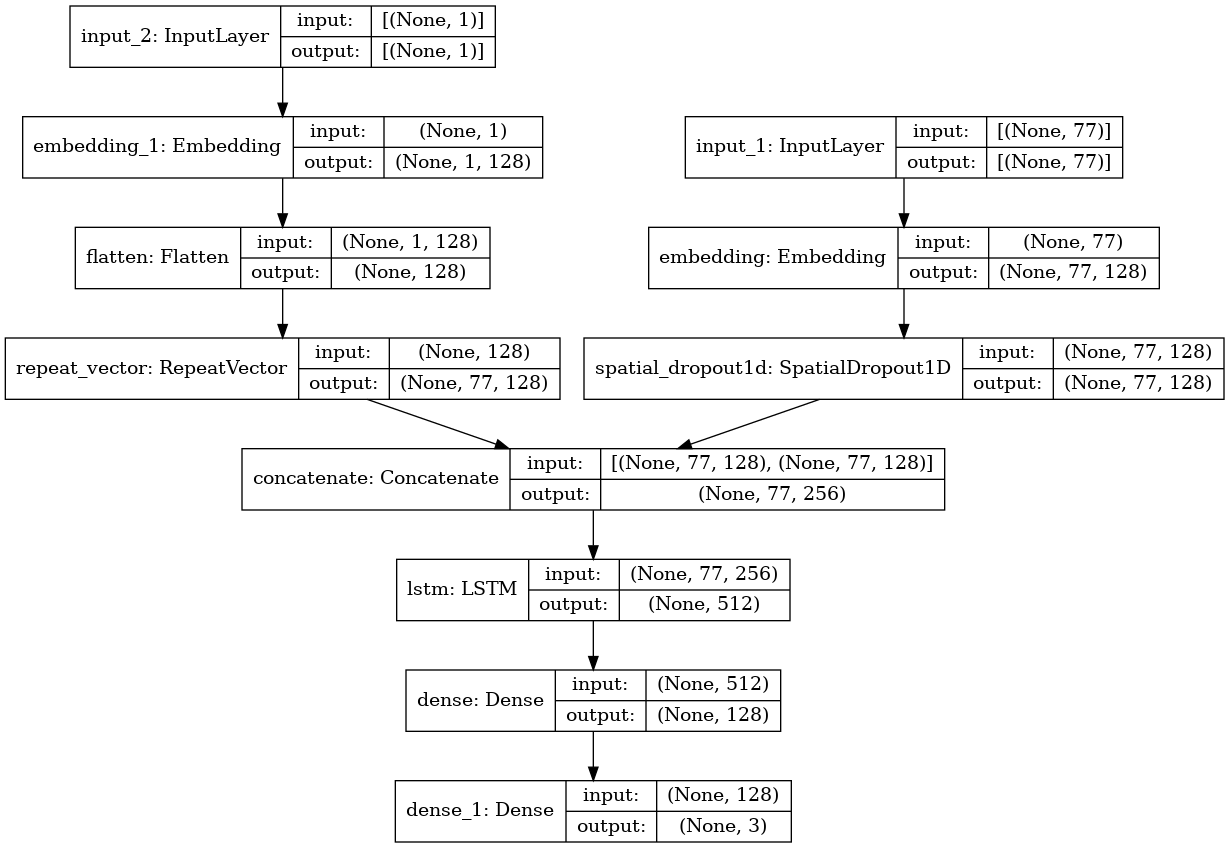

In [39]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(ae_lstm_model, to_file=dot_img_file, show_shapes=True)


In [39]:
y_train.size

2881

In [58]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

ae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history =  ae_lstm_model.fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=16, epochs=20, callbacks = [learning_rate_reduction])

Epoch 1/20
181/181 [==============================] - 7s 25ms/step - loss: 0.9878 - accuracy: 0.5963 - val_loss: 0.8717 - val_accuracy: 0.6019
Epoch 2/20
181/181 [==============================] - 4s 23ms/step - loss: 0.7278 - accuracy: 0.6883 - val_loss: 0.8570 - val_accuracy: 0.6436
Epoch 3/20
181/181 [==============================] - 4s 23ms/step - loss: 0.5982 - accuracy: 0.7706 - val_loss: 0.8872 - val_accuracy: 0.6477
Epoch 4/20
181/181 [==============================] - 4s 23ms/step - loss: 0.4861 - accuracy: 0.8223 - val_loss: 0.9805 - val_accuracy: 0.6560
Epoch 5/20
181/181 [==============================] - 4s 23ms/step - loss: 0.3756 - accuracy: 0.8535 - val_loss: 1.1638 - val_accuracy: 0.6463

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 6/20
181/181 [==============================] - 4s 23ms/step - loss: 0.2522 - accuracy: 0.9042 - val_loss: 1.1769 - val_accuracy: 0.6533

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.9

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [59]:
print("Evaluate on test data")
results = ae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
23/23 [==============================] - 0s 7ms/step - loss: 1.2083 - accuracy: 0.6519
test loss, test acc: [1.2083019018173218, 0.6518723964691162]
Accuracy of the model is -  65.18723964691162 %


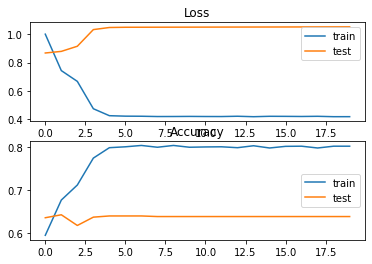

In [43]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

##  Attention-based LSTM (AT-LSTM)

In [60]:
def at_lstm(lstm_units = 512):
        input_text = Input(shape=(Max_Len,))
        input_aspect = Input(shape=(1,),)
        
        word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))
    
        asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence
        hidden_vecs = LSTM(lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask
        print(concat.shape)
         # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        Dense_layer  = Dense(128, activation='relu')(attend_hidden)
        output_layer = Dense(3, activation='softmax')(Dense_layer)
        return Model([input_text, input_aspect], output_layer)

In [61]:
at_lstm_model =  at_lstm()
at_lstm_model.summary()

(None, 69, 640)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 69)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 69, 128)      12800000    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 128)       12800000    input_4[0][0]                    
____________________________________________________________________________

## model training


In [62]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
opt = keras.optimizers.Adam(learning_rate=0.01)

at_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
at_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=10, callbacks = [learning_rate_reduction])

Epoch 1/10
91/91 [==============================] - 4s 31ms/step - loss: 0.9982 - accuracy: 0.5876 - val_loss: 0.9377 - val_accuracy: 0.5978
Epoch 2/10
91/91 [==============================] - 2s 26ms/step - loss: 0.9241 - accuracy: 0.6005 - val_loss: 0.9633 - val_accuracy: 0.6006
Epoch 3/10
91/91 [==============================] - 2s 26ms/step - loss: 0.8996 - accuracy: 0.6168 - val_loss: 0.9673 - val_accuracy: 0.5700

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 4/10
91/91 [==============================] - 2s 26ms/step - loss: 0.8843 - accuracy: 0.6241 - val_loss: 0.9590 - val_accuracy: 0.5839

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Epoch 5/10
91/91 [==============================] - 2s 26ms/step - loss: 0.8625 - accuracy: 0.6300 - val_loss: 0.9536 - val_accuracy: 0.5811

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.
Epoch 6/10
91/91 [==============================] - 

## Model Evaluation

In [63]:
print("Evaluate on test data")
results = at_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
23/23 [==============================] - 0s 8ms/step - loss: 0.9537 - accuracy: 0.5811
test loss, test acc: [0.9537119269371033, 0.5811372995376587]
Accuracy of the model is -  58.11372995376587 %


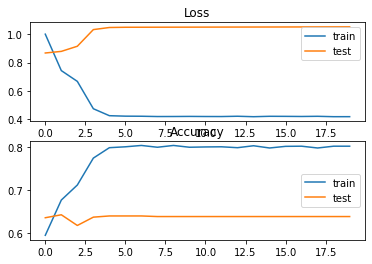

In [48]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Attention-based LSTM with Aspect Embedding (ATAE-LSTM)

In [104]:
def atae_lstm(lstm_units=128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,))

    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.3)(word_embedding(input_text))  # increased dropout

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    
    # LSTM with dropout
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)(input_concat)

    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    # Regularized dense layers
    attend_hidden_dense = Dense(lstm_units, kernel_regularizer=l2_reg)(Dropout(0.3)(attend_hidden))
    last_hidden_dense = Dense(lstm_units, kernel_regularizer=l2_reg)(Dropout(0.3)(state_h))

    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)


In [105]:
from tensorflow.keras import regularizers

l2_reg = regularizers.l2(1e-4)

atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 69)]         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 128)       12800000    input_8[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 69, 128)      12800000    input_7[0][0]                    
____________________________________________________________________________________________

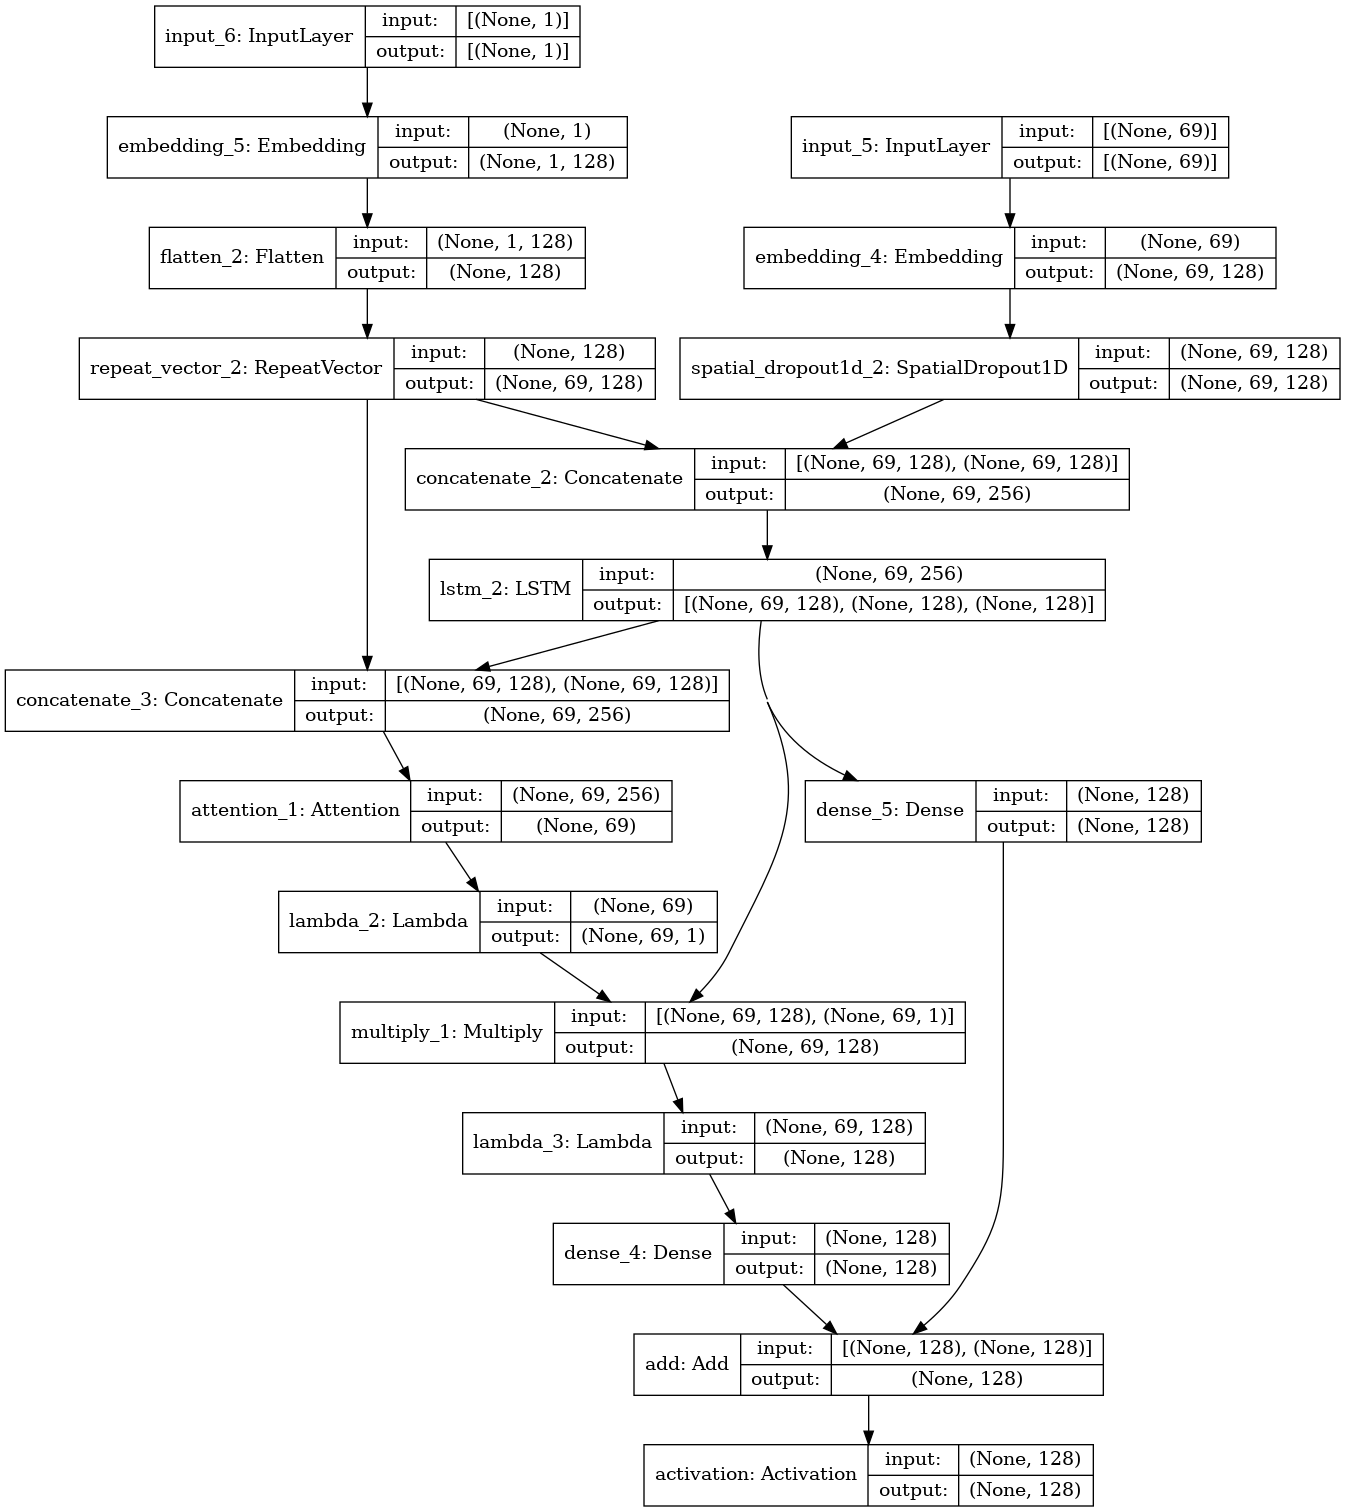

In [51]:
dot_img_file = 'model_3.png'
tf.keras.utils.plot_model(atae_lstm_model, to_file=dot_img_file, show_shapes=True)


## Model Training

In [106]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history=atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=15, callbacks = [learning_rate_reduction])

Epoch 1/15
91/91 [==============================] - 26s 259ms/step - loss: 1.2931 - accuracy: 0.5765 - val_loss: 0.9399 - val_accuracy: 0.6047
Epoch 2/15
91/91 [==============================] - 24s 261ms/step - loss: 0.9367 - accuracy: 0.6526 - val_loss: 1.1775 - val_accuracy: 0.6325
Epoch 3/15
91/91 [==============================] - 24s 259ms/step - loss: 0.8061 - accuracy: 0.7726 - val_loss: 1.5834 - val_accuracy: 0.6741
Epoch 4/15
91/91 [==============================] - 24s 260ms/step - loss: 0.6725 - accuracy: 0.8320 - val_loss: 1.9035 - val_accuracy: 0.6907
Epoch 5/15
91/91 [==============================] - 24s 259ms/step - loss: 0.6273 - accuracy: 0.8542 - val_loss: 1.7332 - val_accuracy: 0.6879

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/15
91/91 [==============================] - 24s 260ms/step - loss: 0.5034 - accuracy: 0.8761 - val_loss: 1.6532 - val_accuracy: 0.7046
Epoch 7/15
91/91 [==============================] - 24s 260m

In [67]:
atae_lstm_model.save('model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [107]:
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
23/23 [==============================] - 0s 21ms/step - loss: 1.8114 - accuracy: 0.7018
test loss, test acc: [1.8114142417907715, 0.7018030285835266]
Accuracy of the model is -  70.18030285835266 %


## model evaluation with pos tagging

In [69]:
df=pd.read_csv('/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv')
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2
df.drop(df[df.polarity == 'conflict'].index, inplace = True)
df.drop(columns=['to','from','id'],inplace=True)
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2
...,...,...,...
3688,Each table has a pot of boiling water sunken i...,pot of boiling water,2
3689,Each table has a pot of boiling water sunken i...,meats,2
3690,Each table has a pot of boiling water sunken i...,vegetables,2
3691,Each table has a pot of boiling water sunken i...,rice,2


In [70]:
import spacy
import pandas as pd

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Sample sentence from your dataset

# Ensure dataframe has unique sentences
df = df.drop_duplicates(subset=['Sentence']).reset_index(drop=True)
df = df.sample(frac=0.2, random_state=42)


def extract_aspects(sentence):
    """Extract aspect terms (nouns) from a sentence."""
    doc = nlp(sentence)
    return [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]

def expand_dataframe(df):
    """Expand dataframe so each aspect term gets its own row."""
    expanded_rows = []
    for _, row in df.iterrows():
        aspects = extract_aspects(row["Sentence"])
        for aspect in aspects:
            expanded_rows.append({"Sentence": row["Sentence"], "Aspect Term": aspect})
    
    return pd.DataFrame(expanded_rows)

# Expand DataFrame with individual aspect terms
df_expanded = expand_dataframe(df)
df_expanded  # Check new dataframe format



,Sentence,Aspect Term
0,"Good food at the restaurant (a bit expensive, ...",food
1,"Good food at the restaurant (a bit expensive, ...",restaurant
2,"Good food at the restaurant (a bit expensive, ...",bit
3,"Good food at the restaurant (a bit expensive, ...",date
4,"During the course of the past 3 months, the ch...",course
...,...,...
1466,"The overall price tag was very very expensive,...",tag
1467,One thing I liked about this place is that I n...,thing
1468,One thing I liked about this place is that I n...,place
1469,One thing I liked about this place is that I n...,table


In [71]:
# Tokenizer setup
NUM_WORDS = 100000  # Adjust based on vocabulary size
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True)

# Fit tokenizer on training data (Make sure X_train is available)
tokenizer.fit_on_texts(list(X_train["Sentence"]))

# Convert text & aspect terms into tokenized sequences
def preprocess_for_model(df, tokenizer, max_len):
    """Tokenize & pad sentence and aspect terms for the model."""
    text_tokenized = tokenizer.texts_to_sequences(df["Sentence"])
    aspect_tokenized = tokenizer.texts_to_sequences(df["Aspect Term"])
    
    text_padded = pad_sequences(text_tokenized, maxlen=max_len)
    aspect_padded = pad_sequences(aspect_tokenized, maxlen=1)  # Aspect terms usually short

    return [text_padded, aspect_padded]

# Get max sentence length from training data
Max_Len = max([len(seq) for seq in tokenizer.texts_to_sequences(X_train["Sentence"])])

# Preprocess test data
test_data = preprocess_for_model(df_expanded, tokenizer, Max_Len)


In [72]:
df_expanded["Predicted Polarity"] = df_expanded.apply(
    lambda row: np.argmax(atae_lstm_model.predict(preprocess_for_model(pd.DataFrame([row]), tokenizer, Max_Len))),
    axis=1
)

print(df_expanded.head())  # Check predictions


                                            Sentence Aspect Term  \
0  Good food at the restaurant (a bit expensive, ...        food   
1  Good food at the restaurant (a bit expensive, ...  restaurant   
2  Good food at the restaurant (a bit expensive, ...         bit   
3  Good food at the restaurant (a bit expensive, ...        date   
4  During the course of the past 3 months, the ch...      course   

   Predicted Polarity  
0                   1  
1                   1  
2                   1  
3                   1  
4                   2  


In [73]:
# Load test dataset
test_df = pd.read_csv("/kaggle/input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv")  # Replace with actual file path
test_df['polarity'][test_df["polarity"] == 'negative'] = 0
test_df['polarity'][test_df["polarity"] == 'positive'] = 1
test_df['polarity'][test_df["polarity"] == 'neutral'] = 2
## Delete the polarity than contains CONFLICT, Means that the sentence contains more than one sentiment when it comes to the aspect term
test_df.drop(test_df[test_df.polarity == 'conflict'].index, inplace = True)
# Merge test_df and df_expanded based on "Sentence" and "Aspect Term"
merged_df = df_expanded.merge(test_df, on=["Sentence", "Aspect Term"], suffixes=("_pred", "_true"))

# Compute accuracy
merged_df


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Sentence,Aspect Term,Predicted Polarity,id,polarity,from,to
0,"Good food at the restaurant (a bit expensive, ...",food,1,1158,1,5,9
1,"During the course of the past 3 months, the ch...",chef,0,3341,0,44,48
2,"During the course of the past 3 months, the ch...",staff,0,3341,0,53,58
3,We were very surprised by how good the food wa...,food,1,502,1,39,43
4,He offers subpar service and has no personality.,service,0,3322,0,17,24
...,...,...,...,...,...,...,...
436,They even have a section in the menu called Am...,menu,0,1439,0,32,36
437,From the spectacular caviar to the hospitable ...,caviar,1,218,1,21,27
438,From the spectacular caviar to the hospitable ...,waitstaff,1,218,1,46,55
439,Had we been stalling I could understand where ...,check,2,1197,0,143,148


In [74]:
print("Polarity unique values:", merged_df["polarity"].unique())
print("Predicted Polarity unique values:", merged_df["Predicted Polarity"].unique())

print("\nData types:")
print(merged_df.dtypes)


Polarity unique values: [1 0 2]
Predicted Polarity unique values: [1 0 2]

Data types:
Sentence              object
Aspect Term           object
Predicted Polarity     int64
id                     int64
polarity              object
from                   int64
to                     int64
dtype: object


In [75]:
merged_df["polarity"] = merged_df["polarity"].astype(int)

accuracy = accuracy_score(merged_df["polarity"], merged_df["Predicted Polarity"])
print(f"Model Test Accuracy: {accuracy:.2%}")

Model Test Accuracy: 84.35%


In [4]:
# from tensorflow.keras.models import load_model
# import spacy
# import pandas as pd

# # Load spaCy's English model
# nlp = spacy.load("en_core_web_sm")


# def extract_aspects(sentence):
#     """Extract aspect terms (nouns) from a sentence."""
#     doc = nlp(sentence)
#     return [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]
    
# def preprocess_for_model(df, tokenizer, max_len):
#     """Tokenize & pad sentence and aspect terms for the model."""
#     #tokenizer.fit_on_texts(list(df["Sentence"]))
#     text_tokenized = tokenizer.texts_to_sequences(df["Sentence"])
#     aspect_tokenized = tokenizer.texts_to_sequences(df["Aspect Term"])
    
#     text_padded = pad_sequences(text_tokenized, maxlen=max_len)
#     aspect_padded = pad_sequences(aspect_tokenized, maxlen=1)  # Aspect terms usually short

#     return [text_padded, aspect_padded]
    
# def predict_from_sentence(sentence, tokenizer, model, max_len):
#     """
#     Given a sentence, extract aspect terms and predict polarity for each.

#     Args:
#         sentence (str): Input sentence.
#         tokenizer: Fitted tokenizer.
#         model: Trained ATAE-LSTM model.
#         max_len (int): Max sentence length used for padding.

#     Returns:
#         List of dicts with aspect and predicted polarity.
#     """
#     aspects = extract_aspects(sentence)
#     results = []

#     for aspect in aspects:
#         df_input = pd.DataFrame({'Sentence': [sentence], 'Aspect Term': [aspect]})
#         text_padded, aspect_padded = preprocess_for_model(df_input, tokenizer, max_len)

#         prediction = model.predict([text_padded, aspect_padded], verbose=0)
#         #print(prediction)
#         predicted_class = int(np.argmax(prediction))

#         results.append({
#             "aspect_term": aspect,
#             "predicted_class": predicted_class
#         })

#     return results

Max_Len=69
atae_lstm_model = load_model(
    '/kaggle/input/models/model (1).h5',
    custom_objects={'Attention': Attention}
)
NUM_WORDS=100000

tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, )



In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import spacy
import pandas as pd
import numpy as np

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Aspect extractor
def extract_aspects(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]

# Preprocessor
def preprocess_for_model(df, tokenizer, max_len):
    text_tokenized = tokenizer.texts_to_sequences(df["Sentence"])
    aspect_tokenized = tokenizer.texts_to_sequences(df["Aspect Term"])

    text_padded = pad_sequences(text_tokenized, maxlen=max_len)
    aspect_padded = pad_sequences(aspect_tokenized, maxlen=1)

    return [text_padded, aspect_padded]



def predict_from_sentence(sentence, tokenizer, model, max_len):
    aspects = extract_aspects(sentence)
    results = []

    for aspect in aspects:
        df_input = pd.DataFrame({'Sentence': [sentence], 'Aspect Term': [aspect]})
        text_padded, aspect_padded = preprocess_for_model(df_input, tokenizer, max_len)

        prediction = model.predict([text_padded, aspect_padded], verbose=0)
        predicted_class = int(np.argmax(prediction))

        results.append({
            "aspect_term": aspect,
            "predicted_class": predicted_class,
            "model_confidence": float(np.max(prediction))
        })

    return results



In [13]:
# Assume tokenizer and model are already loaded
sentence = "This sushi was delicious but the service was bad"

preds = predict_from_sentence(sentence, tokenizer, atae_lstm_model, Max_Len)

label_map = {0: "Negative", 1: "Positive", 2: "Neutral"}
for r in preds:
    print(f"Aspect: {r['aspect_term']} → Sentiment: {label_map[r['predicted_class']]}")


Aspect: sushi → Sentiment: Positive
Aspect: service → Sentiment: Negative
